In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
ROOT = Path('/home/qha/github/Project2_Bassit_Jasso_Ha')
RAW = ROOT / 'data' / 'raw'
PROCESSED = ROOT / 'data' / 'processed'
FIG = ROOT / 'figures'

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

/tmp/ipykernel_821/2284580335.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Import and merge data

In [4]:
# import pbtype
pb = pd.read_csv(PROCESSED / 'pbtype_cleaned.csv', index_col=0)

# import accident
acc = pd.read_csv(PROCESSED / 'accident_2015_2021.csv', index_col=0)

# merge
pb = pb.merge(acc, how='left', on=['ST_CASE', 'YEAR'], validate='m:1')

# generate date var
pb['date'] = pb['YEAR'].astype(str) + '-' + pb['MONTH'].astype(str) + '-' + pb['DAY'].astype(str)
pb['date'] = pd.to_datetime(pb['date'])

In [ ]:
# # number of crashes by year
# yearly_crashes = (pb.groupby(['YEAR'], as_index=False)['PER_NO'].count()
#                   .rename(columns={'YEAR':'Year', 'PER_NO':'Number of Bicyclist Fatalities'}))

# sns.set_style('whitegrid')
# fig, ax = plt.subplots()
# ax.plot(yearly_crashes['Number of Bicyclist Fatalities'], c='blue')

# ax.set_xticklabels(range(2015, 2022, 1), rotation=0)
# ax.set_ylabel('Number of Bicyclist Fatalities')
# ax.set_xlabel('Year')
# ax.grid(True)

# pass

In [ ]:
# # number of crashes by state
# state_crashes = (pb.groupby(['STATENAME'], as_index=False)['PER_NO'].count()
#                   .rename(columns={'STATENAME':'State', 'PER_NO':'Number of Bicyclist Fatalities'})
#                   .sort_values('Number of Bicyclist Fatalities', ascending=False))

# sns.set_style('whitegrid')
# fig, ax = plt.subplots()
# ax.bar(x=state_crashes['State'], height=state_crashes['Number of Bicyclist Fatalities'])

# ax.set_ylabel('Number of Bicyclist Fatalities')
# ax.set_xlabel('State')
# ax.set_xticklabels(state_crashes['State'], rotation=90)
# ax.grid(True)

# fig.set_figwidth(15)
# pass

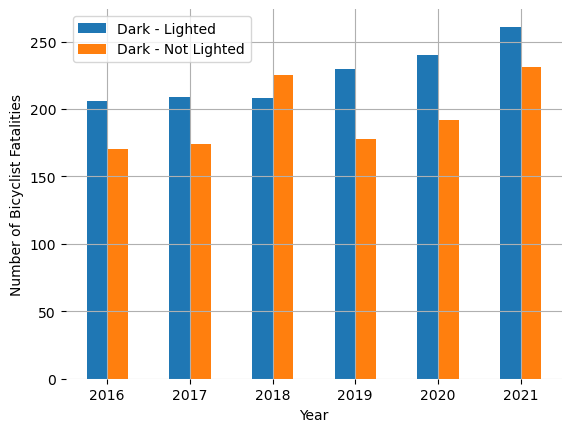

In [6]:
drk = pb[pb['LGT_CONDNAME'].isin(['Dark - Not Lighted', 'Dark - Lighted'])]
drk = drk.groupby(['YEAR', 'LGT_CONDNAME'], as_index=False)['PER_NO'].count()
drk = (drk.pivot_table(values='PER_NO', index='YEAR', columns='LGT_CONDNAME')
       .reset_index().rename_axis(None, axis=1).set_index('YEAR'))

ax = drk.plot(kind="bar")
fig = ax.get_figure()

ax.set_ylabel('Number of Bicyclist Fatalities')
ax.set_xlabel('Year')
ax.set_xticklabels(drk.index, rotation=0)
ax.grid(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.savefig(FIG / 'qh_fig1.png', transparent=True)
pass

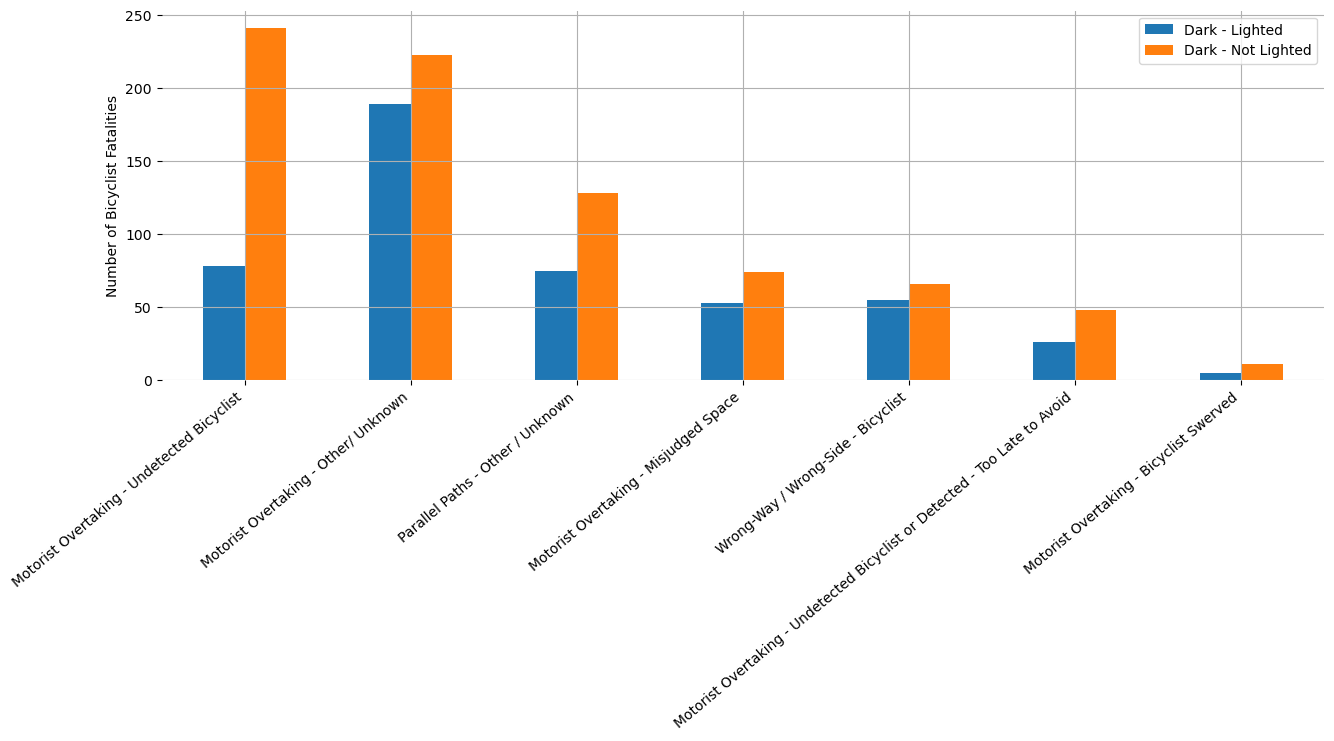

In [11]:
drk2 = pb[pb['LGT_CONDNAME'].isin(['Dark - Not Lighted', 'Dark - Lighted'])]
drk2 = drk2.groupby(['BIKECTYPENAME', 'LGT_CONDNAME'], as_index=False)['PER_NO'].count()
drk2 = (drk2.pivot_table(values='PER_NO', index='BIKECTYPENAME', columns='LGT_CONDNAME')
       .reset_index().rename_axis(None, axis=1).set_index('BIKECTYPENAME'))
drk2 = drk2.fillna(0)
drk2['delta'] = drk2['Dark - Not Lighted'] - drk2['Dark - Lighted']
drk2 = drk2[drk2['delta']>5].drop('delta', axis=1).sort_values('Dark - Not Lighted', ascending=False)

ax = drk2.plot(kind="bar")
fig = ax.get_figure()

ax.set_xticklabels(drk2.index, rotation=40, ha='right')
ax.set_xlabel('')
ax.set_ylabel('Number of Bicyclist Fatalities')
ax.grid(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.set_figwidth(15)
fig.savefig(FIG / 'qh_fig2.png', transparent=True, bbox_inches='tight')
pass

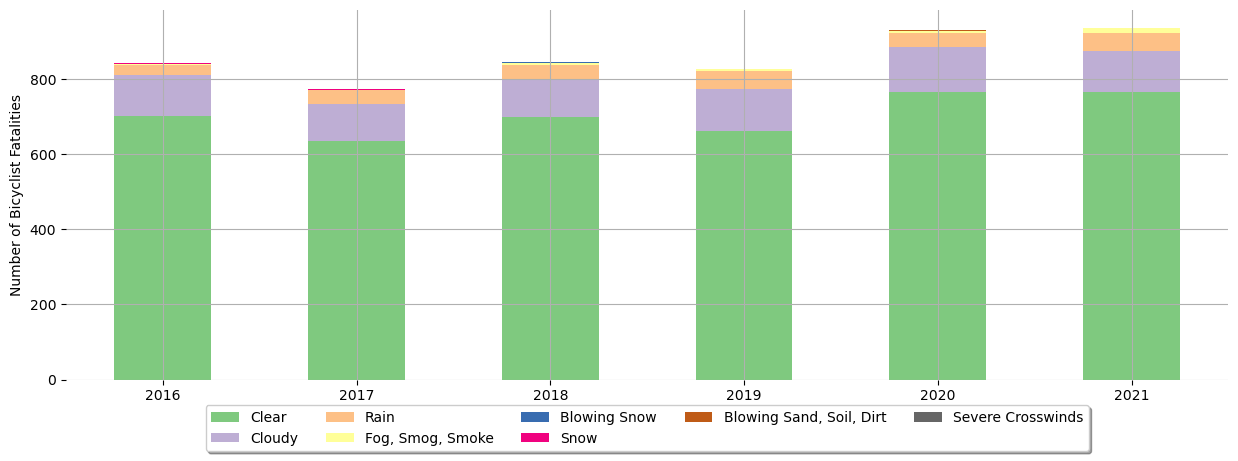

In [12]:
wea = pb[~pb['WEATHERNAME'].isin(['Not Reported', 'Other', 'Reported as Unknown', 'Unknown'])]
wea = wea.groupby(['YEAR', 'WEATHERNAME'], as_index=False)['PER_NO'].count()
wea = (wea.pivot_table(values='PER_NO', index='YEAR', columns='WEATHERNAME')
       .reset_index().rename_axis(None, axis=1).set_index('YEAR'))
wea = wea[['Clear', 'Cloudy', 'Rain', 'Fog, Smog, Smoke', 'Blowing Snow', 'Snow', 'Blowing Sand, Soil, Dirt', 'Severe Crosswinds']]
colormap = plt.cm.Accent
colors = [colormap(i) for i in np.linspace(0, 0.9, wea.shape[1])]

ax = wea.plot(kind="bar", stacked=True, color=colors)
fig = ax.get_figure()

ax.set_xticklabels(wea.index, rotation = 0)
ax.set_ylabel('Number of Bicyclist Fatalities')
ax.set_xlabel('Year')
ax.grid(True)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.set_figwidth(15)
fig.savefig(FIG / 'qh_fig3.png', transparent=True, bbox_inches='tight')
pass